**Table of contents**<a id='toc0_'></a>    
- [load data](#toc1_)    
    - [grouping test](#toc1_1_1_)    
    - [prepare data](#toc1_1_2_)    
- [EDA](#toc2_)    
- [data engineering](#toc3_)    
- [split data](#toc4_)    
- [preprocess](#toc5_)    
  - [imputation](#toc5_1_)    
  - [outlier](#toc5_2_)    
  - [scalling](#toc5_3_)    
- [training](#toc6_)    
- [Test](#toc7_)    
  - [save](#toc7_1_)    
  - [load](#toc7_2_)    
- [Inference](#toc8_)    
  - [prediction](#toc8_1_)    
  - [question selector](#toc8_2_)    
    - [algorithm](#toc8_2_1_)    
    - [reinforcement](#toc8_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [47]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt


In [48]:
np.__version__,pd.__version__,sklearn.__version__

('1.24.3', '2.1.0', '1.3.0')

# <a id='toc1_'></a>[load data](#toc0_)

In [49]:
df = pd.read_csv('datasets/disease/dataset.csv') # datapath 

In [50]:
df.head(4) # see data sample

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [52]:
symptoms = df.loc[:, df.columns != 'Disease']
symptoms[:5]

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count feature

In [53]:
symptoms_numpy = symptoms.values.flatten()

In [54]:
features = set(symptoms_numpy)
features.remove(np.nan)
features,len(features)

({' abdominal_pain',
  ' abnormal_menstruation',
  ' acidity',
  ' acute_liver_failure',
  ' altered_sensorium',
  ' anxiety',
  ' back_pain',
  ' belly_pain',
  ' blackheads',
  ' bladder_discomfort',
  ' blister',
  ' blood_in_sputum',
  ' bloody_stool',
  ' blurred_and_distorted_vision',
  ' breathlessness',
  ' brittle_nails',
  ' bruising',
  ' burning_micturition',
  ' chest_pain',
  ' chills',
  ' cold_hands_and_feets',
  ' coma',
  ' congestion',
  ' constipation',
  ' continuous_feel_of_urine',
  ' continuous_sneezing',
  ' cough',
  ' cramps',
  ' dark_urine',
  ' dehydration',
  ' depression',
  ' diarrhoea',
  ' dischromic _patches',
  ' distention_of_abdomen',
  ' dizziness',
  ' drying_and_tingling_lips',
  ' enlarged_thyroid',
  ' excessive_hunger',
  ' extra_marital_contacts',
  ' family_history',
  ' fast_heart_rate',
  ' fatigue',
  ' fluid_overload',
  ' foul_smell_of urine',
  ' headache',
  ' high_fever',
  ' hip_joint_pain',
  ' history_of_alcohol_consumption',
  

actually you can load from Symptom-serverity

In [55]:
df_serverity = pd.read_csv("datasets/disease/Symptom-severity.csv")

In [56]:
df_serverity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [57]:
# see all the symptom
features = list(df_serverity["Symptom"].unique())
# features = [feature.replace('_', ' ') for feature in features]


In [58]:
features[:5]

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering']

In [59]:
df_serverity["Symptom"].info
# a bit weird because in datasets there are only 131

<bound method Series.info of 0                   itching
1                 skin_rash
2      nodal_skin_eruptions
3       continuous_sneezing
4                 shivering
               ...         
128      inflammatory_nails
129                 blister
130    red_sore_around_nose
131       yellow_crust_ooze
132               prognosis
Name: Symptom, Length: 133, dtype: object>

In [60]:
arr

NameError: name 'arr' is not defined

### <a id='toc1_1_1_'></a>[grouping test](#toc0_)

group it together

In [ ]:

import spacy
nlp = spacy.load('en_core_web_sm')

import re

def remove_hyperlinks(sentence):
    
    #just in case there is hyperlink....
    sentence = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        sentence
    )
    
    return sentence

def preprocessing(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())
            
    #instead of returning tokens, we shall join them
    return " ".join(cleaned_tokens)

def preprocessing_list(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())

    return cleaned_tokens

In [ ]:
# see same words
feature_copy = features.copy()
groups = []
while len(feature_copy):
    feature1 = feature_copy[0]
    feature_copy.remove(feature1)
    groups.append([])
    groups[-1].append(feature1)
    feature1_token = preprocessing_list(feature1)
    for feature2 in feature_copy:
        feature2_token = preprocessing_list(feature2)
        for ft in feature1_token:
            if ft in feature2_token:
                groups[-1].append(feature2)
                feature_copy.remove(feature2)
                break

In [ ]:
preprocessing_list('skin_rash')[0] in preprocessing_list("nodal_skin_eruptions") 

True

In [ ]:
groups

[['itching'],
 ['skin_rash', 'nodal_skin_eruptions', 'yellowish_skin', 'skin_peeling'],
 ['continuous_sneezing', 'continuous_feel_of_urine'],
 ['shivering'],
 ['chills'],
 ['joint_pain',
  'stomach_pain',
  'pain_behind_the_eyes',
  'abdominal_pain',
  'chest_pain',
  'pain_during_bowel_movements',
  'neck_pain',
  'knee_pain',
  'swelling_joints',
  'muscle_pain',
  'belly_pain'],
 ['acidity'],
 ['ulcers_on_tongue'],
 ['muscle_wasting', 'muscle_weakness'],
 ['vomiting'],
 ['burning_micturition'],
 ['spotting_urination', 'red_spots_over_body'],
 ['fatigue'],
 ['weight_gain', 'weight_loss'],
 ['anxiety'],
 ['cold_hands_and_feets'],
 ['mood_swings'],
 ['restlessness'],
 ['lethargy'],
 ['patches_in_throat', 'throat_irritation', 'dischromic_patches'],
 ['irregular_sugar_level'],
 ['cough'],
 ['high_fever', 'mild_fever'],
 ['sunken_eyes',
  'yellowing_of_eyes',
  'redness_of_eyes',
  'puffy_face_and_eyes',
  'watering_from_eyes'],
 ['breathlessness'],
 ['sweating'],
 ['dehydration'],
 ['ind

try sentence similarity

In [ ]:
preprocessing("loss_of_smell")

'loss smell'

In [ ]:
feature_copy = features.copy()
groups = []
while len(feature_copy):
    feature1 = feature_copy[0]
    feature_copy.remove(feature1)
    groups.append([])
    groups[-1].append(feature1)
    for feature2 in feature_copy[1:]:
        similarity = nlp(preprocessing(feature1)).similarity(nlp(preprocessing(feature2)))
        if similarity > 0.5:
            groups[-1].append(feature2)
            feature_copy.remove(feature2)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31304\276967784.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = nlp(preprocessing(feature1)).similarity(nlp(preprocessing(feature2)))


In [ ]:
groups

[['itching',
  'ulcers_on_tongue',
  'lethargy',
  'cough',
  'headache',
  'nausea',
  'diarrhoea',
  'mild_fever',
  'phlegm',
  'dizziness',
  'cramps',
  'bruising',
  'swollen_extremeties',
  'stomach_bleeding'],
 ['skin_rash',
  'stomach_pain',
  'patches_in_throat',
  'yellowish_skin',
  'dark_urine',
  'pain_behind_the_eyes',
  'abdominal_pain',
  'yellow_urine',
  'yellowing_of_eyes',
  'swelling_of_stomach',
  'throat_irritation',
  'redness_of_eyes',
  'runny_nose',
  'chest_pain',
  'irritation_in_anus',
  'neck_pain',
  'swollen_blood_vessels',
  'puffy_face_and_eyes',
  'drying_and_tingling_lips',
  'weakness_of_one_body_side',
  'bladder_discomfort',
  'muscle_pain',
  'red_spots_over_body',
  'belly_pain',
  'mucoid_sputum',
  'rusty_sputum',
  'pus_filled_pimples',
  'skin_peeling',
  'inflammatory_nails',
  'red_sore_around_nose',
  'yellow_crust_ooze'],
 ['nodal_skin_eruptions',
  'muscle_wasting',
  'spotting_urination',
  'irregular_sugar_level',
  'dehydration',
 

In [ ]:
similarity = nlp('fever').similarity(nlp("fever"))

In [ ]:
similarity

1.0

### <a id='toc1_1_2_'></a>[prepare data](#toc0_)

In [61]:
df_preprocess = pd.DataFrame()
df_preprocess['Disease'] = df["Disease"]

In [62]:
df_preprocess['symptoms_text'] = df.drop('Disease', axis=1).apply(lambda x: ' '.join(x.dropna().str.replace(' ','')), axis=1)
df_preprocess['symptoms_text']

0       itching skin_rash nodal_skin_eruptions dischro...
1       skin_rash nodal_skin_eruptions dischromic_patches
2         itching nodal_skin_eruptions dischromic_patches
3                    itching skin_rash dischromic_patches
4                  itching skin_rash nodal_skin_eruptions
                              ...                        
4915    vomiting headache nausea spinning_movements lo...
4916     skin_rash pus_filled_pimples blackheads scurring
4917    burning_micturition bladder_discomfort foul_sm...
4918    skin_rash joint_pain skin_peeling silver_like_...
4919    skin_rash high_fever blister red_sore_around_n...
Name: symptoms_text, Length: 4920, dtype: object

In [63]:
# onehot
df_onehot = pd.concat([df["Disease"],df_preprocess['symptoms_text'].str.get_dummies(sep=' ')],axis=1)
df_onehot.head()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_onehot.to_csv('datasets/disease/dataset_onehot.csv', index=False)

In [64]:
# text
df_preprocess['symptoms_count'] = df_preprocess['symptoms_text'].apply(lambda x: len(x.split()))
df_preprocess.head()

,Disease,symptoms_text,symptoms_count
0,Fungal infection,itching skin_rash nodal_skin_eruptions dischro...,4
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic_patches,3
2,Fungal infection,itching nodal_skin_eruptions dischromic_patches,3
3,Fungal infection,itching skin_rash dischromic_patches,3
4,Fungal infection,itching skin_rash nodal_skin_eruptions,3


In [89]:
df_preprocess.to_csv('datasets/disease/dataset_text.csv', index=False)

In [65]:
df_preprocess.describe()

,symptoms_count
count,4920.000000
mean,7.448780
std,3.592166
min,3.000000
25%,5.000000
50%,6.000000
75%,10.000000
max,17.000000


In [66]:
arr

NameError: name 'arr' is not defined

# <a id='toc2_'></a>[EDA](#toc0_)

note: for classification problem you should always use hua = 'y' which 'y' is label name

In [67]:
import seaborn as sns

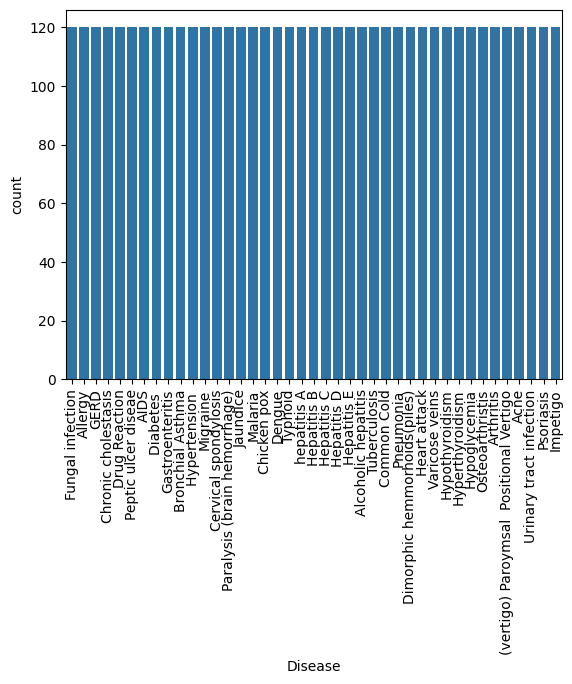

In [68]:
disease_count = sns.countplot(data=df, x="Disease") # see the number of each class
plt.xticks(rotation=90)  # This rotates the x-labels by 90 degrees
plt.show()

* data balanced

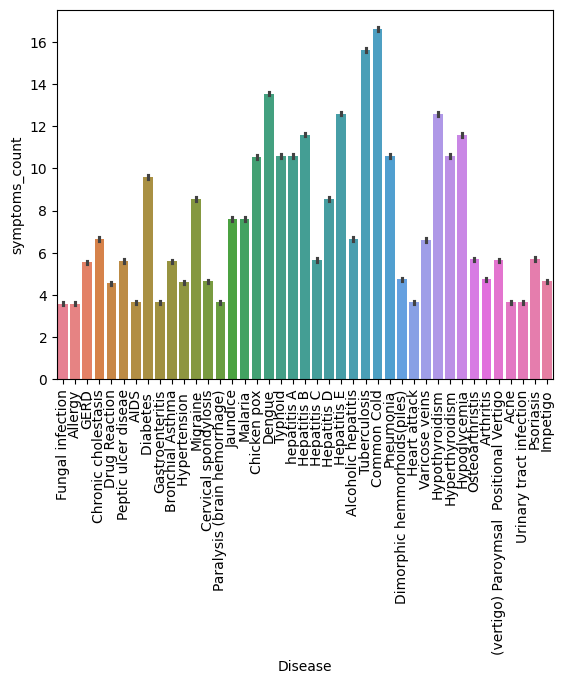

In [69]:
# how many symptoms for each class

sns.barplot(data = df_preprocess ,x = 'Disease', y = "symptoms_count", hue="Disease")
# plt.title("Label Distribution")
plt.xticks(rotation=90)  # Rotate x-labels for readability
plt.show()

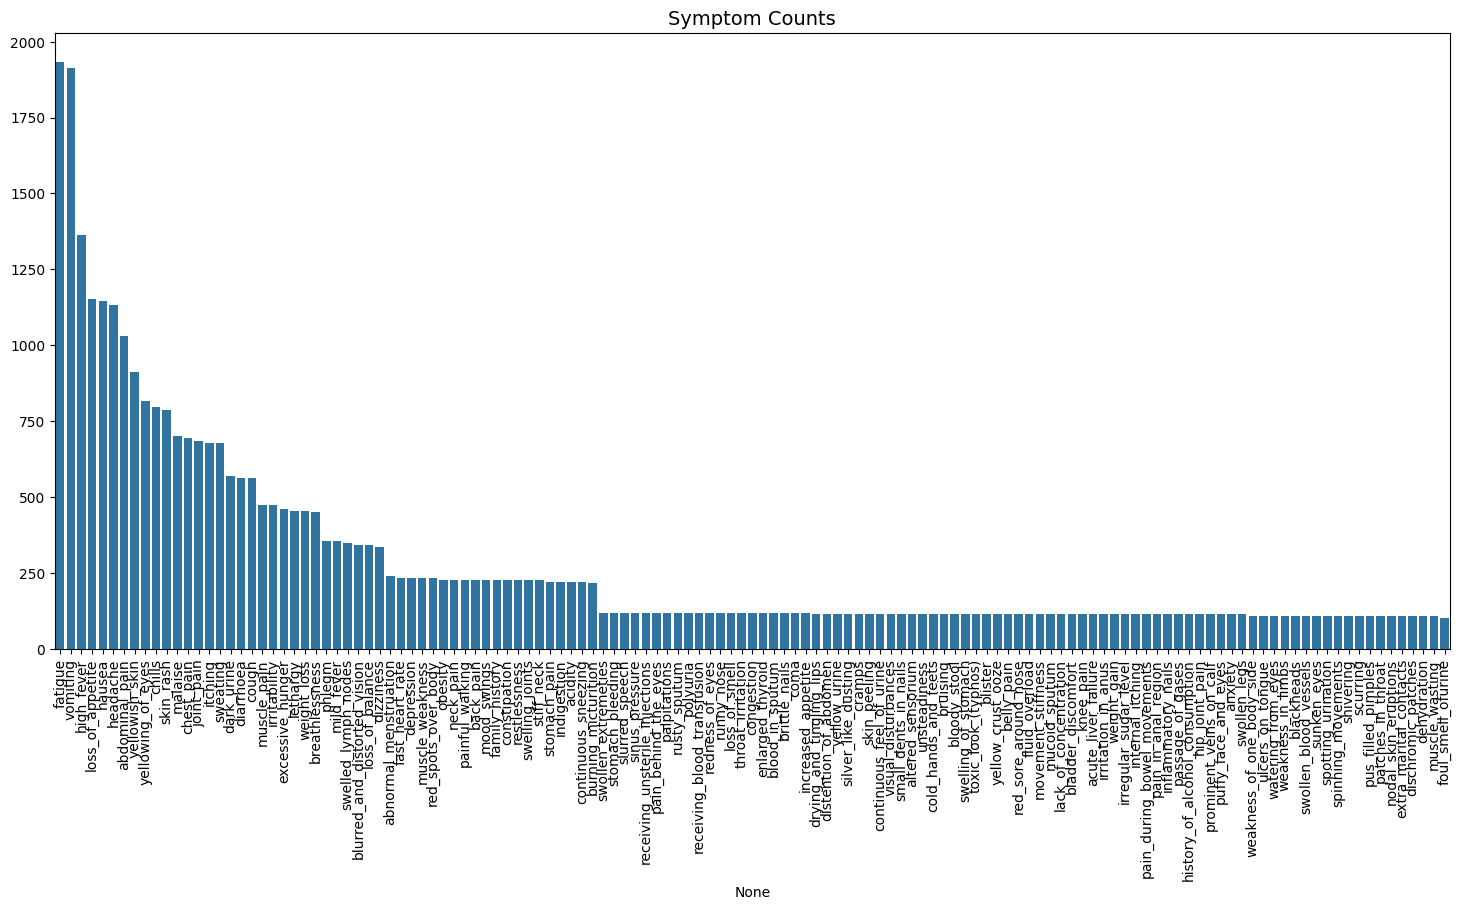

In [87]:
# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = df_onehot.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()




In [ ]:
sns.scatterplot(data=df, x="continuous_data", y="continuous_data",hue='y') # see the relation between feature

In [ ]:
sns.histplot(data=df, x="continuous_data") # see the distribution 

In [ ]:
sns.boxplot(data=df, x="catagory_data or y", y="continuous_data") # see the distibution over catagory data

In [ ]:
sns.barplot(data = df ,x = 'y', y = "continuous_data", hue="y") # 

easy for any task

In [ ]:
# sns.pairplot(df, hue = 'Disease') # see the distribution and scaterplot and also can do 

In [ ]:
# sns.heatmap(df.corr(), annot=True) # see the correation

In [ ]:
# import ppscore as pps

# # before using pps, let's drop country and year
# dfcopy = df.copy()
# dfcopy.drop(['catagory_data1','catagory_data2'], axis='columns', inplace=True)

# #this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
# matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# #plot
# plt.figure(figsize = (15,8))
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

have you ever try this?

In [ ]:
import sweetviz
# report = sweetviz.analyze([df,'train'],target_feat='Disease')
report = sweetviz.analyze(df_onehot,target_feat='Disease')
report.show_html('report.html')

In [ ]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# <a id='toc3_'></a>[data engineering](#toc0_)

In [ ]:
# change the meaning of data from what you get from eda ex cartesian to polar, take log, different value, grouping ..

In [ ]:
# plot again to see new feature

# <a id='toc4_'></a>[split data](#toc0_)

In [ ]:
# for naive bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_preprocess['symptoms_text'])
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# for xg boost

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = df_onehot.drop('Disease',axis=1)
y = df['Disease']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# <a id='toc5_'></a>[preprocess](#toc0_)

## <a id='toc5_1_'></a>[imputation](#toc0_)

In [ ]:
# X_train.isna().sum() # check null value

In [ ]:
# y_train.value_counts() # check catagory value

## <a id='toc5_2_'></a>[outlier](#toc0_)

In [ ]:
# # see the outlier percentage
# def outlier_count(col, data = X_train):
    
#     # calculate your 25% quatile and 75% quatile
#     q75, q25 = np.percentile(data[col], [75, 25])
    
#     # calculate your inter quatile
#     iqr = q75 - q25
    
#     # min_val and max_val
#     min_val = q25 - (iqr*1.5)
#     max_val = q75 + (iqr*1.5)
    
#     # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
#     outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
#     # calculate the percentage of the outliers
#     outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
#     if(outlier_count > 0):
#         print("\n"+15*'-' + col + 15*'-'+"\n")
#         print('Number of outliers: {}'.format(outlier_count))
#         print('Percent of data that is outlier: {}%'.format(outlier_percent))

## <a id='toc5_3_'></a>[scalling](#toc0_)

no continuose data

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling helps improve reach convergence faster
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

# <a id='toc6_'></a>[training](#toc0_)

the algorithm should try   
-[x] multinomial naive bayes (baseline)  
-[ ] random forrest (baseline)  
-[ ] dicision tree   
-[x] gradient or xg boost   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
import xgboost

xg_classifier = xgboost.XGBClassifier()

In [ ]:
xg_classifier.fit(X_train, y_train,
                eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:0.42781
[1]	validation_0-mlogloss:0.33555


[2]	validation_0-mlogloss:0.26645
[3]	validation_0-mlogloss:0.21098
[4]	validation_0-mlogloss:0.16859
[5]	validation_0-mlogloss:0.13328
[6]	validation_0-mlogloss:0.10568
[7]	validation_0-mlogloss:0.08406
[8]	validation_0-mlogloss:0.06691


c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

[9]	validation_0-mlogloss:0.05385
[10]	validation_0-mlogloss:0.04372
[11]	validation_0-mlogloss:0.03586
[12]	validation_0-mlogloss:0.02964
[13]	validation_0-mlogloss:0.02483
[14]	validation_0-mlogloss:0.02104
[15]	validation_0-mlogloss:0.01800
[16]	validation_0-mlogloss:0.01553
[17]	validation_0-mlogloss:0.01359
[18]	validation_0-mlogloss:0.01196
[19]	validation_0-mlogloss:0.01079
[20]	validation_0-mlogloss:0.01008
[21]	validation_0-mlogloss:0.00966
[22]	validation_0-mlogloss:0.00934
[23]	validation_0-mlogloss:0.00916
[24]	validation_0-mlogloss:0.00902
[25]	validation_0-mlogloss:0.00892
[26]	validation_0-mlogloss:0.00888
[27]	validation_0-mlogloss:0.00884
[28]	validation_0-mlogloss:0.00881
[29]	validation_0-mlogloss:0.00878
[30]	validation_0-mlogloss:0.00876
[31]	validation_0-mlogloss:0.00874
[32]	validation_0-mlogloss:0.00871
[33]	validation_0-mlogloss:0.00869
[34]	validation_0-mlogloss:0.00867
[35]	validation_0-mlogloss:0.00865
[36]	validation_0-mlogloss:0.00864
[37]	validation_0-mlo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Get feature importance scores from the model
feature_importance = xg_classifier.feature_importances_

# Sort the features by importance (in descending order)
sorted_indices = np.argsort(feature_importance)[::-1]

In [ ]:

# symptom = np.zeros(131) ==> symptom[i] = 1  ==> xg_classifier.predict([symptom])
predict_disease = xg_classifier.predict(X_train.iloc[:2])
# xg_classifier.predict_proba(X_train.iloc[:2])
label_encoder.inverse_transform(predict_disease)

c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

array(['Cervical spondylosis', 'Hepatitis B'], dtype=object)

In [ ]:
# use x1
#any random_state you can use......up to you 
mnb = MultinomialNB()
# lr = LogisticRegression(random_state=96)
# rf = RandomForestClassifier(random_state=96)
# sv = SVC(random_state=96)
# gnb = GaussianNB()

models = [mnb]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=96)


for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0


In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler

# # Offline upsampling could look like this:
# #first upsample / downsample
# smote = SMOTE(random_state = 11)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# #then do scaling + modeling
# pipeline = Pipeline(steps = [['scaler', MinMaxScaler()], ['classifier', LogisticRegression(random_state=11, max_iter=1000)]])

# param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
# kfold = KFold(n_splits = 5, shuffle = True, random_state=999) 
# grid_search = GridSearchCV(estimator=pipeline,  param_grid=param_grid, scoring='roc_auc', cv=kfold,  n_jobs=-1)

# # Online upsampling could look like this:

# #put smote as pipeline
# pipeline = Pipeline(steps = [['smote', SMOTE(random_state=11)], ['scaler', MinMaxScaler()], ['classifier', LogisticRegression(random_state=11,  max_iter=1000)]])

# param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
# kfold = KFold(n_splits = 5, shuffle = True, random_state=999)
# grid_search = GridSearchCV(estimator=pipeline,  param_grid=param_grid, scoring='roc_auc', cv=kfold,  n_jobs=-1)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
#               'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

# rf = RandomForestRegressor(random_state = 1)

# grid = GridSearchCV(estimator = rf, 
#                     param_grid = param_grid, 
#                     cv = kfold, 
#                     n_jobs = -1, 
#                     return_train_score=True, 
#                     refit=True,
#                     scoring='neg_mean_squared_error')

# # Fit your grid_search
# grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

# <a id='toc7_'></a>[Test](#toc0_)

xg boost

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,xg_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       1.00    

c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

naive bayes

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,mnb.predict(X_test)))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

## <a id='toc7_1_'></a>[save](#toc0_)

In [ ]:
import pickle
import os

name = "Xg_boost"

# save the model to disk
model_path = f"models/{name}/"

if not os.path.exists(model_path):
    os.makedirs(model_path,exist_ok=True)

filename = model_path + 'disease_predictor.pkl'
preprocess_name = model_path + 'label_encoder.pkl'
pickle.dump(xg_classifier, open(filename, 'wb'))
pickle.dump(label_encoder, open(preprocess_name, 'wb'))

In [ ]:
import pickle
import os

name = "MultinomialNB"

# save the model to disk
model_path = f"models/{name}/"

if not os.path.exists(model_path):
    os.makedirs(model_path,exist_ok=True)

filename = model_path + 'disease_predictor.pkl'
preprocess_name = model_path + 'vectorizer.pkl'
pickle.dump(mnb, open(filename, 'wb'))
pickle.dump(vectorizer, open(preprocess_name, 'wb'))


## <a id='toc7_2_'></a>[load](#toc0_)

In [ ]:
import pickle
import os

mnb = pickle.load(open("models/MultinomialNB/disease_predictor.pkl", 'rb'))
vectorizer = pickle.load(open("models/MultinomialNB/vectorizer.pkl",'rb')) 

# <a id='toc8_'></a>[Inference](#toc0_)

## <a id='toc8_1_'></a>[prediction](#toc0_)

In [ ]:
# Assuming 'clf' is your trained model and 'vectorizer' is your CountVectorizer
# Define new symptoms
new_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches', '', '', '', '', '', '', '', '', '', '', '', '', '']

# Preprocess the new symptoms
new_symptoms_str = ' '.join(new_symptoms)
new_symptoms_vectorized = vectorizer.transform([new_symptoms_str])

# Make predictions
predicted_disease = mnb.predict(new_symptoms_vectorized)

print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Fungal infection


In [ ]:
class_probabilities = mnb.predict_proba(new_symptoms_vectorized)
class_probabilities

array([[4.31563038e-09, 1.63054647e-08, 1.50388892e-06, 2.42702611e-09,
        1.72880852e-08, 7.26295389e-09, 4.26463383e-09, 7.83081707e-09,
        4.44357912e-06, 2.30427910e-07, 9.87066429e-11, 1.88341041e-08,
        7.10413974e-10, 7.26295389e-09, 6.68981749e-05, 9.99925449e-01,
        4.61015467e-09, 1.61708486e-08, 1.67178060e-08, 3.33772706e-08,
        4.21438832e-09, 1.06696391e-09, 2.68925631e-10, 8.22123796e-09,
        5.04941678e-10, 3.66305912e-10, 2.72148674e-10, 7.25433835e-07,
        1.46409387e-07, 1.59401451e-09, 1.05805403e-09, 4.16488063e-09,
        1.63054647e-08, 4.29003739e-09, 5.03187649e-10, 3.83169018e-07,
        1.24062554e-10, 3.66305912e-10, 1.60376188e-08, 2.59670839e-09,
        5.01441229e-10]])

In [ ]:
np.where(class_probabilities[0])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [ ]:
class_probabilities[0].argmax()

15

In [ ]:
mnb.classes_,class_probabilities[0][15],mnb.classes_[15]

(array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
        'Osteoarthristis', 'Paralysis (brain hemorrhage)',
        'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
        'Typhoid', 'Urinary tract infection', 'Varicose veins',
        'hepatitis A'], dtype='<U39'),
 0.99992544898337,
 'Fungal infection')

In [ ]:
class_probabilities.sum()

1.0000000000000009

In [ ]:
vectorizer.get_feature_names_out()

## <a id='toc8_2_'></a>[question selector](#toc0_)

https://cs.wellesley.edu/~anderson/writing/naive-bayes.pdf  
https://citeseerx.ist.psu.edu/doc/10.1.1.60.3182  

### <a id='toc8_2_1_'></a>[algorithm](#toc0_)

plan1

1. random initial question that cover many disease first like fatigue,fever,headache,loss of apentite, nausea, skinrash,vommiting and yellow  (base on the sweetviz report)

2. give out the next questiontion use the prob of disease to select the related symptom.

3. if yes go on ask another symptom for confirm, else change to second prop disese and try ask symptom related to that disease 

4. stop when prob exceed threshold 0.8

notice: what will happen if user only say no no no or yes yes yes,just for fun
- if question more than n times, list all left feature to let user select? or just say "i don't know"



In [113]:
import random

class naive_doctor:

    def __init__(self,model,vectorizer):
        self.vectorizer = vectorizer
        self.model = model
        self.current_symptoms = []
        self.asked_question = []
        self.common_symptoms = ["skin_rash","high_fever","headache"] # this is just example, can sort by only counting because data is balanced
        
    def prop_predict(self,input_text):

        new_symptoms_vectorized = self.vectorizer.transform([input_text])
        class_probabilities = self.model.predict_proba(new_symptoms_vectorized)

        return class_probabilities
    
    def diagnosis(self,answer = None):


        if answer == None:
            self.current_symptoms = []
            symptom = self.initial_guess()
            self.asked_question = [symptom]
            s= symptom.replace("_"," ")
            question = f"Do you have {s}? (Y/N): " # question_for_symptom[symptom]
            answer = self.questioning(question)
            if answer =="y":
                self.current_symptoms.append(symptom)
            return self.diagnosis(answer=answer)



        cls_prop = self.prop_predict(' '.join(self.current_symptoms))[0]
        cls_prop_idx = sorted(np.where(cls_prop)[0],key= lambda x:cls_prop[x],reverse=True)


        if max(cls_prop) > 0.8:
            print(max(cls_prop))
            return self.model.classes_[cls_prop.argmax()]
        


        
        for disease_idx in cls_prop_idx:


            
            # find feature related to disease
            symptoms_prop =np.exp(self.model.feature_log_prob_[disease_idx])
            symptom_list = np.where(symptoms_prop > 0.01)[0]
            symptom_list = sorted(symptom_list, key=lambda x:symptoms_prop[x],reverse=True)

            for symptom_idx in symptom_list:

                symptom = self.vectorizer.get_feature_names_out()[symptom_idx]
                if symptom not in self.asked_question:
                    s= symptom.replace("_"," ")
                    question = f"Do you have {s}? (Y/N): "
                    answer = self.questioning(question)
                    self.asked_question.append(symptom)
                    
                    if answer =="y":

                        self.current_symptoms.append(symptom)
                        return self.diagnosis(answer=answer)

                    else:
                        if len(self.asked_question)> 5:
                            return "i don't know.."
                        break
        
                    
    def initial_guess(self):
        symptom = random.choice(self.common_symptoms)
        return symptom
    

    def questioning(self,question):
        """
        change here to request, for deploy flask
        """

        while True:
            user_input = input(question).lower()
            if user_input == 'y' or user_input == 'n':
                return user_input
            else:
                print("Invalid input. Please enter 'y' for yes or 'n' for no.")


                


In [108]:
test_doctor = naive_doctor(model=mnb,vectorizer=vectorizer)

In [ ]:
new_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches'] # example for Fungal infection

In [ ]:
test_doctor.diagnosis() 

0.9625985266046814


'Fungal infection'

In [ ]:
test_doctor.diagnosis() # try random y n

0.9560410191413765


'Hypertension '

In [115]:
test_doctor.diagnosis() # say only no

"i don't know.."

### <a id='toc8_2_2_'></a>[reinforcement](#toc0_)

create the question selector agent that will select the optimal question base on current symptom information and propbability of diseas predictior model  

plan 1  
  
observe space:   
* prop from disease predictor  
* current symptoms (not have idea yet)  

reward:  
* +10 (mean symptoms for each disease ~ 7.8) when disease predictor confident exceed threshold 0.8 
* -1 every question ask  

action:  
131 question for symptoms 

env:

- random sample from data set  
* give yes no or propably  

extra: 
can it detect?
- say yes and no only guy
- random guy



https://www.gymlibrary.dev/content/environment_creation/

In [2]:
import gym
gym.__version__

'0.26.2'

In [ ]:


class patient(gym.env):

    def __init__(self):
        pass

    